In [ ]:
!python -m pip install -U gensim
!python -m pip install -U nltk
!python -m pip install -U scikit-learn
!python -m pip install -U pandas
!python -m pip install -U matplotlib
!python -m pip install -U seaborn
!python -m pip install -U plotly
!python -m pip install -U wordcloud

You should consider upgrading via the '/Users/harishpaulthavisi/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/harishpaulthavisi/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/harishpaulthavisi/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/harishpaulthavisi/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/harishpaulthavisi/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/harishpaulthavisi/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/harishpaulthavisi/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 2

In [ ]:
import gensim
gensim.__version__

'4.3.1'

In [ ]:
# Root Path Modifier

google_colab = False

assets_root_path = 'drive/MyDrive/' if google_colab else '/Users/harishpaulthavisi/Downloads/swm_project/'
dataset_root_path = f'{assets_root_path}Colab Datasets/20news-bydate/' if google_colab else f'{assets_root_path}20news-bydate/'
model_root_path = f'{assets_root_path}Colab Models/CSE573_GroupProject_Doc2Vec/' if google_colab else f'{assets_root_path}Models/'
model_save_path = f'{model_root_path}model.bin'

In [ ]:
# if google_colab:
#     from google.colab import drive
#     drive.mount('/content/drive/')

# DATA PRE-PROCESSING:

In [ ]:
import nltk
#
nltk.download('all')

import os
import string
from nltk.stem import WordNetLemmatizer

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print(ENGLISH_STOP_WORDS)

sw_nltk = stopwords.words('english')
print(sw_nltk)

wordnet_lemmatizer = WordNetLemmatizer()

def preprocess_textfile(filepath):
    # text reading
    tokens = []
    with open(filepath, 'r', encoding='utf8', errors='ignore') as f:
        text = f.read()
        # removal of stopwords
        # words = [word for word in text.split() if word.lower() not in sw_nltk]
        words = [word.lower() for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS]
        new_text = " ".join(words)
        # print("Old length: ", len(text))
        # print("New length: ", len(new_text))
        # Removal of punctutaions
        tr_table = str.maketrans("", "", string.punctuation)
        s1 = new_text.translate(tr_table)
        # Tokenize the text
        tokenization = nltk.word_tokenize(s1)
        # lemmatize each token
        for w in tokenization:
            tokens.append(wordnet_lemmatizer.lemmatize(w).lower())
    # print(len(tokens))
    return tokens


rootdir = f'{dataset_root_path}20news-bydate-train/'
cleanedpath = f'{dataset_root_path}20news-bydate-train-processed/'

for dir in os.listdir(rootdir):
    dirpath = os.path.join(rootdir, dir)
    if os.path.isdir(dirpath):
        newdirpath = os.path.join(cleanedpath, dir)
        if not os.path.exists(newdirpath):
            os.makedirs(newdirpath)
        dirfile = open(newdirpath + "_file.json", 'w')
        tokendict = {}
        for file in os.listdir(dirpath):
            filepath = os.path.join(dirpath, file)
            # print(filepath)
            tokens = preprocess_textfile(filepath)
            newfilepath = os.path.join(newdirpath, file + "_cleaned")
            newfile = open(newfilepath, "w")
            newfile.write('\n'.join(tokens))
            tokendict[file] = tokens
            newfile.close
        dirfile.write(str(tokendict))
        dirfile.close()



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/harishpaulthavisi/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/harishpaulthavisi/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/harishpaulthavisi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/harishpaulthavisi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/harishpaulthavisi/nltk_data...
[nltk_data]    |   Package basque_grammars is a

frozenset({'another', 'were', 'ever', 'interest', 'due', 'thereby', 'which', 'already', 'too', 'alone', 'but', 'hasnt', 'forty', 'only', 'thereupon', 'can', 'myself', 'on', 'if', 'the', 'fire', 'three', 'their', 'this', 'both', 'someone', 'been', 'four', 'made', 'below', 'whatever', 'even', 'my', 'they', 'whereupon', 'behind', 'that', 'enough', 'beside', 'anyway', 'there', 'twelve', 'is', 'still', 'off', 'take', 'might', 'be', 'thin', 'you', 'sometimes', 'while', 'mill', 'since', 'anywhere', 'moreover', 'yet', 'thus', 'anyone', 'otherwise', 'however', 'indeed', 'beforehand', 'sixty', 'always', 'thence', 'our', 'nor', 'somewhere', 'would', 'yours', 'everyone', 'than', 'had', 'and', 'as', 'nevertheless', 'we', 'once', 'last', 'above', 'everywhere', 'former', 'its', 'from', 'hence', 'nothing', 'around', 'becomes', 'meanwhile', 'side', 'was', 'us', 're', 'onto', 'except', 'namely', 'mostly', 'further', 'should', 'move', 'it', 'something', 'amongst', 'after', 'these', 'during', 'never', 'th

DATASET LINK:
http://qwone.com/~jason/20Newsgroups/

Google Drive File Manager: https://towardsdatascience.com/how-to-manage-files-in-google-drive-with-python-d26471d91ecd

In [ ]:
# from pathlib import Path
# total_dir_files = len(list(Path('drive/MyDrive/Colab Datasets/20news-bydate/20news-bydate-train/').rglob('*')))
# total_dir_files

# IMPLEMENTATION NOTES:

Find out the best Embedding Methodology for Documents. Infer Doc2Vec code to get the embeddings for the whole Document. Also, explore the HuggingFace transformers Models for a Document Embedding Model. Basically, any BERT Sequence Transformer Model will work.

Use the existing k_means Clustering Libraries for PyTorch/Sklearn. The difference will be that our num_clusters will be only 2 in each iteration. Once an iteration is converged, then take the cluster with the maximum Intra-cluster variance and then further do the split by 2. Kep doing this until we reach the total number of clusters equal to 20.

PyTorch K-Means Library: https://pypi.org/project/kmeans-pytorch/



In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, BisectingKMeans
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
documents = {}
document_keys = set()
topic_list = []
topic_dict = {}
train_files_directory = f'{dataset_root_path}20news-bydate-train-processed/'
# The Processed Documents Count is lower, because of Errors.

document_embedding_vector_size = 512

In [ ]:
for topic_dir in os.listdir(train_files_directory):
  curr_dir = train_files_directory+topic_dir
  if os.path.isdir(curr_dir):
    topic_list.append(topic_dir)
    for file in os.listdir(curr_dir):
      unique_file_key = f'{topic_dir}.{file}'
      document_keys.add(unique_file_key)
      with open(f'{curr_dir}/{file}',mode='r', encoding='utf-8',errors='ignore') as file_content:
        documents[unique_file_key] = file_content.read().split('\n')
print(len(documents))
topic_dict = {topic:i for i,topic in enumerate(topic_list)}

11314


In [ ]:
tagged_documents = [TaggedDocument(documents[key],[key]) for key in documents.keys()]

In [ ]:
tagged_documents[0]

TaggedDocument(words=['from', 'bf3833pyuxeccbellcorecom', 'feigenbaumbenjamin', 'subject', 're', 'israel', 'expansion', 'ii', 'organization', 'bellcore', 'livingston', 'nj', 'summary', 'hope', 'spring', 'eternal', 'line', '37', 'article', '1993apr2001303720907newscolumbiaedu', 'pgf5cunixbcccolumbiaedu', 'peter', 'garfiel', 'freeman', 'writes', 'article', '19apr93223044620062vm1mcgillca', 'b8hamusicbmcgillca', 'b8ha', 'writes', 'so', 'nice', 'answer', 'question', 'nice', 'of', 'feel', 'heart', 'palestinian', 'some', 'land', 'focus', 'fact', 'israel', 'annexed', 'this', 'land', 'kind', 'gesture', 'back', 'well', 'i', 'hope', 'state', 'run', 'palestinian', 'established', 'the', 'decision', 'make', 'jerusalem', 'state', 'by', 'annexing', 'course', 'steve', 'steve', 'israeli', 'stupid', 'allow', 'second', 'palestinian', 'state', 'the', 'jordon', 'probably', 'wish', 'israeli', 'whats', 'coming', 'them', 'however', 'palestinian', 'demonstrate', 'govern', 'live', 'peace', 'jewish', 'neighbor',

In [ ]:
doc2vec_model = Doc2Vec(tagged_documents, vector_size=document_embedding_vector_size, workers=(2 if google_colab else 8), epochs=500) 
# Colab CPU has 2 Cores

In [ ]:
document_vectors = {}
for document_key in document_keys:
  document_vectors[document_key] = doc2vec_model.docvecs[document_key]

temp_items = list(document_keys)[:10]
print(temp_items[0])
print(document_vectors[temp_items[0]])

soc.religion.christian.20961_cleaned
[ 0.04376008  0.59892213  1.9394546   0.79054654  1.4689665  -0.24616252
 -2.452342   -0.02961631  2.659402   -2.244178    1.2440612  -1.5139148
  2.1155264  -0.27493364  0.19806336  0.6418787   4.58994    -2.1966796
 -1.7026234  -1.2585562  -0.4096092  -1.0066903   2.149152   -0.10357023
  0.5734739   1.2461455  -0.2895706   0.25015724 -1.7121071   1.1599826
  0.29412237 -1.8247346  -0.33421376  0.5343078  -2.4612966  -1.497481
  2.0374515  -0.823337    0.3872761  -0.03467641  2.6856742   3.477504
  2.339285    1.0227741  -0.5988244   1.3239313  -0.39589572 -2.0367823
 -2.1226873  -1.0417856  -1.6821384  -1.1751345  -0.4868827  -1.8753545
  0.06338321 -2.973049    1.4471126   0.05515343  1.2272031   1.6253749
  2.3321211  -2.6739845  -0.82555556  2.504244    0.13769597  2.6677823
 -1.7197627  -2.0998745   0.20505586 -2.78768     1.9506589  -1.0122641
 -0.5174519  -2.7512763  -1.4992354   2.9916313   0.25836292 -0.9344496
 -1.9965575   1.5125387  -1

/var/folders/t_/w6_phbgd6s99pxvtz8snnjf80000gn/T/ipykernel_7319/1283641784.py:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  document_vectors[document_key] = doc2vec_model.docvecs[document_key]


In [ ]:
model_vector = doc2vec_model.infer_vector(['hello', 'world', 'everyone'])

In [ ]:
doc2vec_model.save(model_save_path)
document_vectors_save_path = f'{model_root_path}document_vectors'
doc2vec_model.save_word2vec_format(document_vectors_save_path, doctag_vec=True)

In [ ]:
doc2vec_loaded_model = Doc2Vec.load(model_save_path)
loaded_model_vector = doc2vec_loaded_model.infer_vector(['hello','world', 'everyone'])
document_vectors = {}
for document_key in document_keys:
  document_vectors[document_key] = doc2vec_loaded_model.dv[document_key]

In [ ]:
print(np.sqrt(np.dot(model_vector, loaded_model_vector)))
print(np.sqrt(np.dot(model_vector/(np.linalg.norm(model_vector)), loaded_model_vector/(np.linalg.norm(loaded_model_vector)))))

6.735303
0.9610073


# DOCUMENT CLUSTERING (HIERARCHICAL/BISECTING K-MEANS):

In [ ]:
document_vectors_list = list(document_vectors.items())

bisecting_kmeans_model = BisectingKMeans(n_clusters=20, init='k-means++',n_init=20, max_iter=200000, verbose=0).fit([doc_vec[1] for doc_vec in document_vectors_list])
# algorithm='elkan', bisecting_strategy='largest_cluster'

print('Non-normalized Vector Inertia:',bisecting_kmeans_model.inertia_)

Non-normalized Vector Inertia: 6426446.344453663


In [ ]:
# Divide Documents into their respective Clusters
document_clusters = {} # Document->Cluster Mapping
clustered_documents = [[] for j in range(20)] # Cluster->[Documents] List

for doc_id, label in zip([doc_vec[0] for doc_vec in document_vectors_list], bisecting_kmeans_model.labels_):
    document_clusters[doc_id] = label
    clustered_documents[label].append(doc_id)

In [ ]:
# document_clusters['talk.politics.misc.178314_cleaned']
for i in range(20):
    print(f'Cluster {i} has {len(clustered_documents[i])} Documents')
clustered_documents[1][:10]

Cluster 0 has 568 Documents
Cluster 1 has 344 Documents
Cluster 2 has 160 Documents
Cluster 3 has 1021 Documents
Cluster 4 has 141 Documents
Cluster 5 has 231 Documents
Cluster 6 has 675 Documents
Cluster 7 has 188 Documents
Cluster 8 has 726 Documents
Cluster 9 has 279 Documents
Cluster 10 has 661 Documents
Cluster 11 has 542 Documents
Cluster 12 has 983 Documents
Cluster 13 has 297 Documents
Cluster 14 has 685 Documents
Cluster 15 has 334 Documents
Cluster 16 has 854 Documents
Cluster 17 has 1204 Documents
Cluster 18 has 494 Documents
Cluster 19 has 927 Documents


['talk.politics.guns.54230_cleaned',
 'sci.crypt.15724_cleaned',
 'sci.crypt.15419_cleaned',
 'sci.electronics.53819_cleaned',
 'talk.politics.mideast.76314_cleaned',
 'sci.crypt.15661_cleaned',
 'sci.crypt.15432_cleaned',
 'sci.crypt.15503_cleaned',
 'rec.motorcycles.104650_cleaned',
 'talk.politics.misc.178526_cleaned']

In [ ]:
def remove_suffix(input_string, suffix):
    if suffix and input_string.endswith(suffix):
        return input_string[:-len(suffix)]
    return input_string

In [ ]:
import shutil

train_raw_data_path = f'{dataset_root_path}20news-bydate-train/'
clustered_data_save_path = f'{dataset_root_path}20news-bydate-train-clustered/'
if not os.path.exists(clustered_data_save_path):
    os.makedirs(clustered_data_save_path)
num_clusters = 20
for i in range(num_clusters):
    clustered_file_directory_path = f'{clustered_data_save_path}cluster_{i+1}/'
    if not os.path.exists(clustered_file_directory_path):
        os.makedirs(clustered_file_directory_path)
    else:
        shutil.rmtree(clustered_file_directory_path)
        os.makedirs(clustered_file_directory_path)
    for file in clustered_documents[i]:
        file_split = file.rsplit('.',1)
        file_name = remove_suffix(file_split[1],'_cleaned')
        original_file_path = f'{train_raw_data_path}{file_split[0]}/{file_name}'
        clustered_file_path = f'{clustered_file_directory_path}{file_name}'
        shutil.copy2(original_file_path,clustered_file_path)
    print(f'Copied All Files for Cluster {i+1}')

Copied All Files for Cluster 1
Copied All Files for Cluster 2
Copied All Files for Cluster 3
Copied All Files for Cluster 4
Copied All Files for Cluster 5
Copied All Files for Cluster 6
Copied All Files for Cluster 7
Copied All Files for Cluster 8
Copied All Files for Cluster 9
Copied All Files for Cluster 10
Copied All Files for Cluster 11
Copied All Files for Cluster 12
Copied All Files for Cluster 13
Copied All Files for Cluster 14
Copied All Files for Cluster 15
Copied All Files for Cluster 16
Copied All Files for Cluster 17
Copied All Files for Cluster 18
Copied All Files for Cluster 19
Copied All Files for Cluster 20


# DATA VISUALIZATION:

In [ ]:
# ELBOW METHOD TO FIND THE OPTIMAL NUMBER OF CLUSTERS

document_vectors = {}
for document_key in document_keys:
  document_vectors[document_key] = doc2vec_loaded_model.dv[document_key]

# temp_items = list(document_keys)[:10]
# print(temp_items[0])
# print(document_vectors[temp_items[0]])

ssd = []
input_dt = list(document_vectors.values())
for num_clusters in list(range(1,100)):
    model_clus = KMeans(n_clusters = num_clusters,random_state= 50)
    model_clus.fit(input_dt)
    print(num_clusters, ': ', model_clus.inertia_)
    ssd.append(model_clus.inertia_)

/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1 :  6668638.427903463


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 :  6620535.429334693


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 :  6590653.721150165


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 :  6569451.367944647


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 :  6565562.56992669


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 :  6563571.305989303


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 :  6528122.488221772


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 :  6507764.011396773


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 :  6501553.101241411


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 :  6521505.96194328


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11 :  6476944.907283482


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12 :  6463722.596108294


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13 :  6474960.867666074


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


14 :  6462914.5509255845


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15 :  6450867.393539117


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16 :  6462790.427953554


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


17 :  6431674.352259956


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18 :  6465242.946355468


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


19 :  6470591.123660926


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


20 :  6453125.095203059


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


21 :  6418171.520825185


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


22 :  6416607.471602863


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


23 :  6420038.969114758


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


24 :  6436572.82798047


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


25 :  6408878.183687517


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


26 :  6427652.461477958


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


27 :  6392447.459679909


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


28 :  6420116.86882376


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


29 :  6402230.075299669


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


30 :  6410794.362350374


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


31 :  6380516.502353948


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32 :  6408650.245763136


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


33 :  6383242.462064987


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


34 :  6399647.259690888


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


35 :  6369959.270431435


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


36 :  6376390.126621189


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


37 :  6357915.278227806


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


38 :  6352385.794129706


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


39 :  6367009.599500661


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


40 :  6353867.214598882


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


41 :  6352086.45067998


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


42 :  6373756.140015909


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


43 :  6334254.999829632


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


44 :  6336346.537752934


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


45 :  6338392.956528483


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


46 :  6363801.3057204


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


47 :  6344976.331807159


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


48 :  6357235.301676779


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


49 :  6320331.743197886


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


50 :  6317054.627226444


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


51 :  6318193.579471057


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


52 :  6314626.367456437


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


53 :  6341873.552264733


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


54 :  6346818.320050167


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


55 :  6355797.654362746


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


56 :  6316184.165506356


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


57 :  6335821.3058295585


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


58 :  6323429.791631244


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


59 :  6304759.250246305


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


60 :  6302937.625773812


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


61 :  6304311.946936724


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


62 :  6301737.218780307


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


63 :  6312633.024771588


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


64 :  6306237.677427194


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


65 :  6303646.680030668


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


66 :  6296633.114941487


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


67 :  6290038.980923842


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


68 :  6293154.15854804


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


69 :  6284108.542875477


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


70 :  6294167.654412726


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


71 :  6288005.903123791


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


72 :  6294240.762200259


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


73 :  6275086.538138246


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


74 :  6275769.320679153


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


75 :  6293654.724806009


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


76 :  6294643.190240983


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


77 :  6276849.802470449


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


78 :  6254400.039233489


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


79 :  6279355.486246876


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


80 :  6249815.03796131


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


81 :  6254440.031874397


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


82 :  6274905.5693716975


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


83 :  6268570.195409603


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


84 :  6271971.330029551


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


85 :  6236087.445476001


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


86 :  6281663.4289377


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


87 :  6267320.23984335


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


88 :  6257354.2766362205


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


89 :  6267335.975373004


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


90 :  6271213.059695492


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


91 :  6241953.232749312


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


92 :  6243414.932234883


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


93 :  6239905.289089438


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


94 :  6248411.971230982


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


95 :  6246563.392920962


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


96 :  6229974.220259466


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


97 :  6226627.3226938825


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


98 :  6214793.689114204


/Users/harishpaulthavisi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


99 :  6236445.479864093


Text(0.5, 1.0, 'ELBOW to identify Ideal Cluster Size')

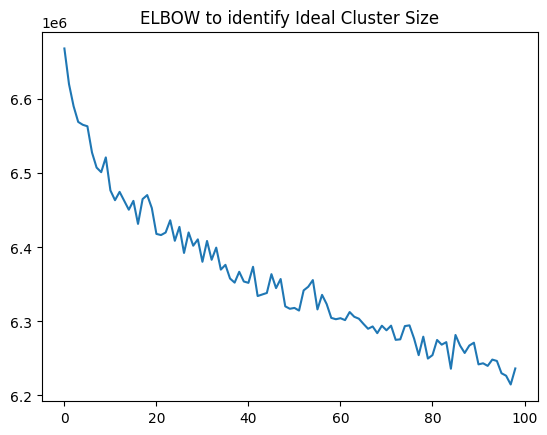

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ssd)
plt.title('ELBOW to identify Ideal Cluster Size')

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# Works decently well for 32 vector size, but testing for 50->64 if the results will be better.
tagged_documents = [TaggedDocument(documents[key],[key]) for key in documents.keys()]
tsne_doc2vec_model = Doc2Vec(tagged_documents, vector_size=64, workers=(2 if google_colab else 8), epochs=500) # Colab CPU has 2 Cores

tsne_visualization_model_save_path = f'{model_root_path}tsne_viz_model.bin'
tsne_doc2vec_model.save(tsne_visualization_model_save_path)

document_vectors = {}
for document_key in document_keys:
  document_vectors[document_key] = tsne_doc2vec_model.dv[document_key]

In [ ]:
tsne_visualization_model_save_path = f'{model_root_path}tsne_viz_model.bin'
tsne_doc2vec_model = Doc2Vec.load(tsne_visualization_model_save_path)

In [ ]:
input_dt = []
document_train_label = []

document_vectors_save_path = f'{model_root_path}document_vectors'
# document_vectors = Doc2Vec.load_word2vec_format(document_vectors_save_path)

# ADD CLASS LABEL NUMBERS
# for dv_key, dv_value in document_vectors.items():
# #     if topic_dict[dv_key.rsplit('.',1)[0]]<15:
# #         document_train_label.append(topic_dict[dv_key.rsplit('.',1)[0]])
# #         input_dt.append(dv_value)
#     document_train_label.append(topic_dict[dv_key.rsplit('.',1)[0]])
#     input_dt.append(dv_value)

# ADD CLASS LABEL NAME
for dv_key, dv_value in document_vectors.items():
#     if topic_dict[dv_key.rsplit('.',1)[0]]<15:
#         document_train_label.append(topic_dict[dv_key.rsplit('.',1)[0]])
#         input_dt.append(dv_value)
    document_train_label.append(dv_key.rsplit('.',1)[0])
    input_dt.append(dv_value)

In [ ]:
# 2-Dimensional tSNE Visualization

tsne_model_2d_5000_20 = TSNE(n_components=2, n_jobs=-1, n_iter=5000, perplexity=20) # n_iter=5000
tsne_fit_2d_5000_20 = tsne_model_2d_5000_20.fit_transform(np.asarray(input_dt))

# Save Results
tsne_fit_2d_5000_20_results_path = f'{assets_root_path}Results/tsne_fit_2d_5000_20.npy'
np.save(tsne_fit_2d_5000_20_results_path,tsne_fit_2d_5000_20)

In [ ]:
# Load and Use Results
tsne_fit_2d_5000_20 = np.load(tsne_fit_2d_5000_20_results_path)

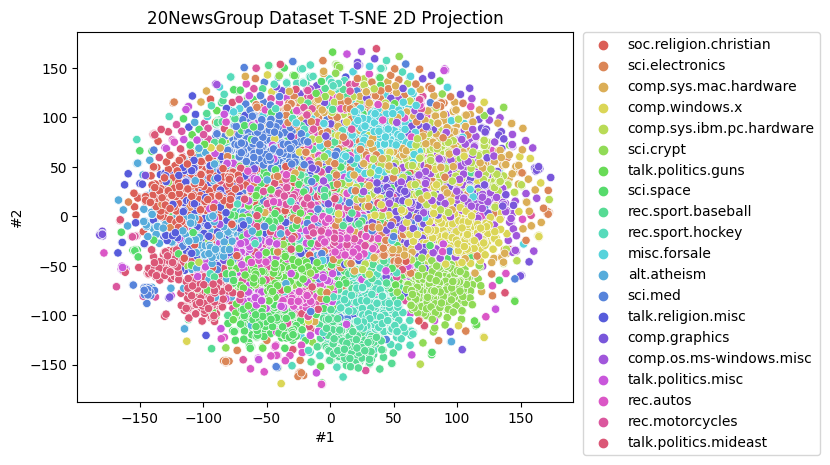

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tsne_fit = tsne_fit_2d_5000_20

tsne_data = pd.DataFrame()
tsne_data["y"] = document_train_label
tsne_data["#1"] = tsne_fit[:,0]
tsne_data["#2"] = tsne_fit[:,1]

sns.scatterplot(x="#1", y="#2", hue=tsne_data.y.tolist(), palette=sns.color_palette("hls",20),data=tsne_data).set(title="20NewsGroup Dataset T-SNE 2D Projection")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
# Same plot as above, but increasing the perplexity

tsne_model_2d_5000_50 = TSNE(n_components=2, n_jobs=-1, n_iter=5000, perplexity=50) # n_iter=5000
tsne_fit_2d_5000_50 = tsne_model_2d_5000_50.fit_transform(np.asarray(input_dt))

# Save Results
tsne_fit_2d_5000_50_results_path = f'{assets_root_path}Results/tsne_fit_2d_5000_50.npy'
np.save(tsne_fit_2d_5000_50_results_path,tsne_fit_2d_5000_50)

In [ ]:
# Load and Use Results
tsne_fit_2d_5000_50 = np.load(tsne_fit_2d_5000_50_results_path)

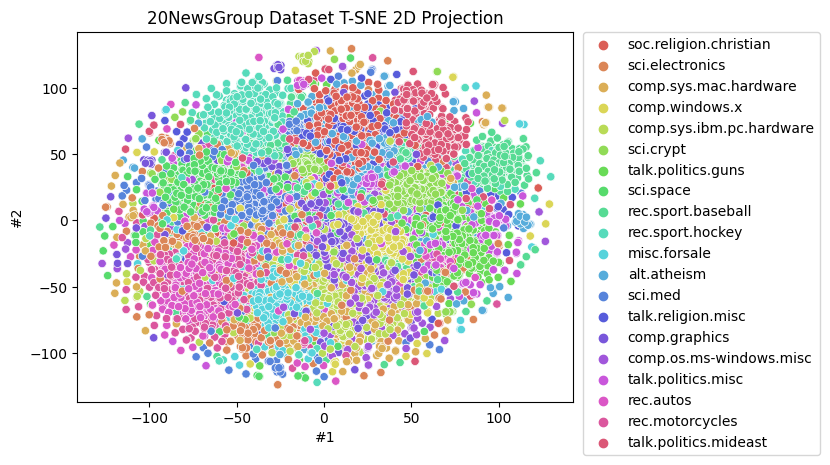

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tsne_fit = tsne_fit_2d_5000_50

tsne_data = pd.DataFrame()
tsne_data["y"] = document_train_label
tsne_data["#1"] = tsne_fit[:,0]
tsne_data["#2"] = tsne_fit[:,1]

sns.scatterplot(x="#1", y="#2", hue=tsne_data.y.tolist(), palette=sns.color_palette("hls",20),data=tsne_data).set(title="20NewsGroup Dataset T-SNE 2D Projection")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
# Same plot as above, but increasing the perplexity even more

tsne_model_2d_5000_100 = TSNE(n_components=2, n_jobs=-1, n_iter=5000, perplexity=100) # , n_iter=5000
tsne_fit_2d_5000_100 = tsne_model_2d_5000_100.fit_transform(np.asarray(input_dt))

# Save Results
tsne_fit_2d_5000_100_results_path = f'{assets_root_path}Results/tsne_fit_2d_5000_100.npy'
np.save(tsne_fit_2d_5000_100_results_path,tsne_fit_2d_5000_100)

In [ ]:
# Load and Use Results
tsne_fit_2d_5000_100 = np.load(tsne_fit_2d_5000_100_results_path)

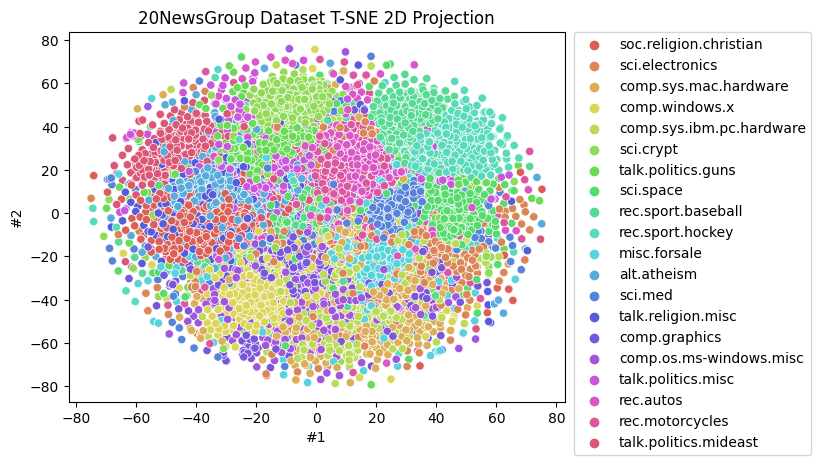

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tsne_fit = tsne_fit_2d_5000_100

tsne_data = pd.DataFrame()
tsne_data["y"] = document_train_label
tsne_data["#1"] = tsne_fit[:,0]
tsne_data["#2"] = tsne_fit[:,1]

sns.scatterplot(x="#1", y="#2", hue=tsne_data.y.tolist(), palette=sns.color_palette("hls",20),data=tsne_data).set(title="20NewsGroup Dataset T-SNE 2D Projection")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
# Same plot as above, but increasing the iterations

tsne_model_2d_10000_100 = TSNE(n_components=2, n_jobs=-1, n_iter=10000, perplexity=100) # , n_iter=5000
tsne_fit_2d_10000_100 = tsne_model_2d_10000_100.fit_transform(np.asarray(input_dt))

# Save Results
tsne_fit_2d_10000_100_results_path = f'{assets_root_path}Results/tsne_fit_2d_10000_100.npy'
np.save(tsne_fit_2d_10000_100_results_path,tsne_fit_2d_10000_100)

In [ ]:
# Load and Use Results
tsne_fit_2d_10000_100 = np.load(tsne_fit_2d_10000_100_results_path)

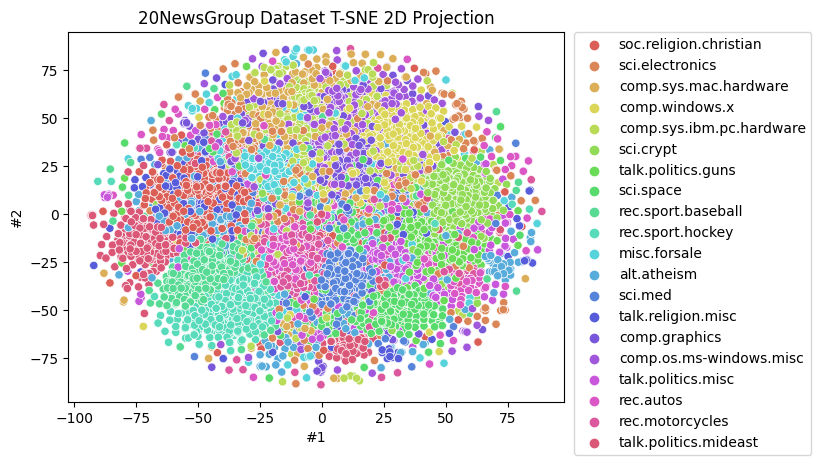

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tsne_fit = tsne_fit_2d_10000_100

tsne_data = pd.DataFrame()
tsne_data["y"] = document_train_label
tsne_data["#1"] = tsne_fit[:,0]
tsne_data["#2"] = tsne_fit[:,1]

sns.scatterplot(x="#1", y="#2", hue=tsne_data.y.tolist(), palette=sns.color_palette("hls",20),data=tsne_data).set(title="20NewsGroup Dataset T-SNE 2D Projection")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
# Same plot as above, but increasing the perplexity even more

tsne_model_2d_10000_200 = TSNE(n_components=2, n_jobs=-1, n_iter=10000, perplexity=200)
tsne_fit_2d_10000_200 = tsne_model_2d_10000_200.fit_transform(np.asarray(input_dt))

# Save Results
tsne_fit_2d_10000_200_results_path = f'{assets_root_path}Results/tsne_fit_2d_10000_200.npy'
np.save(tsne_fit_2d_10000_200_results_path,tsne_fit_2d_10000_200)

In [ ]:
# Load and Use Results
tsne_fit_2d_10000_200 = np.load(tsne_fit_2d_10000_200_results_path)

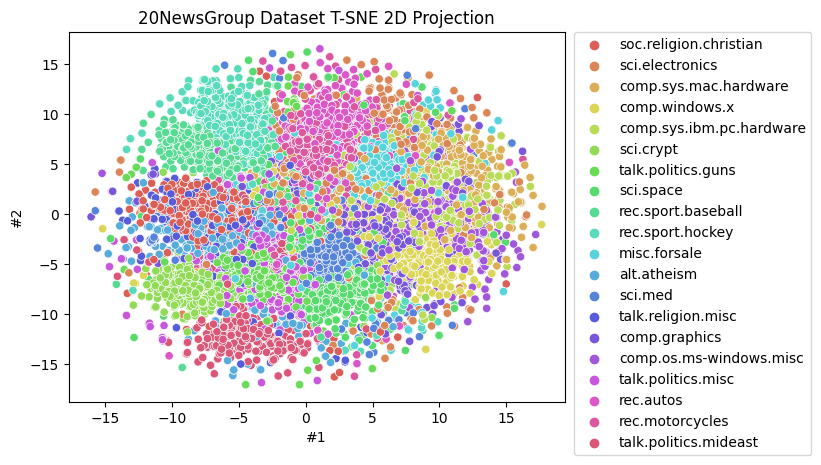

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tsne_fit = tsne_fit_2d_10000_200

tsne_data = pd.DataFrame()
tsne_data["y"] = document_train_label
tsne_data["#1"] = tsne_fit[:,0]
tsne_data["#2"] = tsne_fit[:,1]

sns.scatterplot(x="#1", y="#2", hue=tsne_data.y.tolist(), palette=sns.color_palette("hls",20),data=tsne_data).set(title="20NewsGroup Dataset T-SNE 2D Projection")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
# 3-Dimensional Interactive tSNE Visualization

tsne_model_3d_5000_20 = TSNE(n_components=3, n_jobs=-1, n_iter=5000, perplexity=20) # , n_iter=5000
tsne_fit_3d_5000_20 = tsne_model_3d_5000_20.fit_transform(np.asarray(input_dt))

# Save Results
tsne_fit_3d_5000_20_results_path = f'{assets_root_path}Results/tsne_fit_3d_5000_20.npy'
np.save(tsne_fit_3d_5000_20_results_path,tsne_fit_3d_5000_20)

In [ ]:
# Load and Use Results
tsne_fit_3d_5000_20_results_path = f'{assets_root_path}Results/tsne_fit_3d_5000_20.npy'
tsne_fit_3d_5000_20 = np.load(tsne_fit_3d_5000_20_results_path)

In [ ]:
import plotly.express as px

tsne_fit = tsne_fit_3d_5000_20

tsne_data = pd.DataFrame()
tsne_data["y"] = document_train_label
tsne_data["#1"] = tsne_fit[:,0]
tsne_data["#2"] = tsne_fit[:,1]
tsne_data["#3"] = tsne_fit[:,2]

figure = px.scatter_3d(tsne_data, x='#1', y='#2', z='#3', color='y')
figure.show()

In [ ]:
# Same plot as above, but with large perplexity

tsne_model_3d_5000_50 = TSNE(n_components=3, n_jobs=-1, n_iter=5000, perplexity=50) # , n_iter=5000
tsne_fit_3d_5000_50 = tsne_model_3d_5000_50.fit_transform(np.asarray(input_dt))

# Save Results
tsne_fit_3d_5000_50_results_path = f'{assets_root_path}Results/tsne_fit_3d_5000_50.npy'
np.save(tsne_fit_3d_5000_50_results_path,tsne_fit_3d_5000_50)

In [ ]:
# Load and Use Results
tsne_fit_3d_5000_50 = np.load(tsne_fit_3d_5000_50_results_path)

In [ ]:
import plotly.express as px

tsne_fit = tsne_fit_3d_5000_50

tsne_data = pd.DataFrame()
tsne_data["y"] = document_train_label
tsne_data["#1"] = tsne_fit[:,0]
tsne_data["#2"] = tsne_fit[:,1]
tsne_data["#3"] = tsne_fit[:,2]

figure = px.scatter_3d(tsne_data, x='#1', y='#2', z='#3', color='y')
figure.show()

In [ ]:
# Same plot as above, but with even larger perplexity

tsne_model_3d_5000_100 = TSNE(n_components=3, n_jobs=-1, n_iter=5000, perplexity=100) # , n_iter=5000
tsne_fit_3d_5000_100 = tsne_model_3d_5000_100.fit_transform(np.asarray(input_dt))

# Save Results
tsne_fit_3d_5000_100_results_path = f'{assets_root_path}Results/tsne_fit_3d_5000_100.npy'
np.save(tsne_fit_3d_5000_100_results_path,tsne_fit_3d_5000_100)

In [ ]:
# Load and Use Results
tsne_fit_3d_5000_100 = np.load(tsne_fit_3d_5000_100_results_path)

In [ ]:
import plotly.express as px

tsne_fit = tsne_fit_3d_5000_100

tsne_data = pd.DataFrame()
tsne_data["y"] = document_train_label
tsne_data["#1"] = tsne_fit[:,0]
tsne_data["#2"] = tsne_fit[:,1]
tsne_data["#3"] = tsne_fit[:,2]

figure = px.scatter_3d(tsne_data, x='#1', y='#2', z='#3', color='y')
figure.show()

In [ ]:
# Same plot as above, but with larger iterations

tsne_model_3d_10000_100 = TSNE(n_components=3, n_jobs=-1, n_iter=10000, perplexity=100) # , n_iter=5000
tsne_fit_3d_10000_100 = tsne_model_3d_10000_100.fit_transform(np.asarray(input_dt))

# Save Results
tsne_fit_3d_10000_100_results_path = f'{assets_root_path}Results/tsne_fit_3d_10000_100.npy'
np.save(tsne_fit_3d_10000_100_results_path,tsne_fit_3d_10000_100)

In [ ]:
# Load and Use Results
tsne_fit_3d_10000_100 = np.load(tsne_fit_3d_10000_100_results_path)

In [ ]:
import plotly.express as px

tsne_fit = tsne_fit_3d_10000_100

tsne_data = pd.DataFrame()
tsne_data["y"] = document_train_label
tsne_data["#1"] = tsne_fit[:,0]
tsne_data["#2"] = tsne_fit[:,1]
tsne_data["#3"] = tsne_fit[:,2]

figure = px.scatter_3d(tsne_data, x='#1', y='#2', z='#3', color='y')
figure.show()

In [ ]:
# Same plot as above, but with even larger perplexity

tsne_model_3d_10000_200 = TSNE(n_components=3, n_jobs=-1, n_iter=10000, perplexity=200) # , n_iter=5000
tsne_fit_3d_10000_200 = tsne_model_3d_10000_200.fit_transform(np.asarray(input_dt))

# Save Results
tsne_fit_3d_10000_200_results_path = f'{assets_root_path}Results/tsne_fit_3d_10000_200.npy'
np.save(tsne_fit_3d_10000_200_results_path,tsne_fit_3d_10000_200)

In [ ]:
# Load and Use Results
tsne_fit_3d_10000_200 = np.load(tsne_fit_3d_10000_200_results_path)

In [ ]:
import plotly.express as px

tsne_fit = tsne_fit_3d_10000_200

tsne_data = pd.DataFrame()
tsne_data["y"] = document_train_label
tsne_data["#1"] = tsne_fit[:,0]
tsne_data["#2"] = tsne_fit[:,1]
tsne_data["#3"] = tsne_fit[:,2]

figure = px.scatter_3d(tsne_data, x='#1', y='#2', z='#3', color='y')

visualization_save_path = f'{assets_root_path}Results/tsne_fit_3d_10000_200_interactive_visualization.html'
figure.write_html(visualization_save_path)
figure.show()

In [ ]:
# WordCloud Visualization

# SOURCE: https://www.datacamp.com/tutorial/wordcloud-python
# SOURCE: https://github.com/amueller/word_cloud
from wordcloud import WordCloud

# DOCUMENT CLUSTERING EVALUATION:

In [ ]:
# IDENTIFY DOMINATING TOPIC IN CLUSTERS:

from gensim.models.doc2vec import Doc2Vec
doc2vec_loaded_model = Doc2Vec.load(model_save_path)

def get_dominating_topic(documents):
    document_topics = [document.rsplit('.',1)[0] for document in documents]
    return max(document_topics, key=document_topics.count)

document_cluster_dominating_topic = []
for i in range(len(clustered_documents)):
    document_cluster_dominating_topic.append(get_dominating_topic(clustered_documents[i]))
print('Dominating Topics:',document_cluster_dominating_topic)

Dominating Topics: ['talk.politics.misc', 'sci.crypt', 'talk.politics.mideast', 'talk.politics.guns', 'talk.politics.mideast', 'alt.atheism', 'soc.religion.christian', 'rec.autos', 'rec.motorcycles', 'sci.space', 'rec.sport.hockey', 'comp.os.ms-windows.misc', 'comp.graphics', 'comp.sys.mac.hardware', 'comp.graphics', 'misc.forsale', 'comp.graphics', 'misc.forsale', 'comp.windows.x', 'comp.windows.x']


In [ ]:
# ASSIGN ORIGINAL & PREDICTED CLUSTER TO ALL DOCUMENTS
document_label_predicted_dict_names = {}
document_label_predicted_dict_indices = [[],[]] # [ORIGINAL, PREDICTED]

for doc_id in documents.keys():
    document_label_predicted_dict_names[doc_id] = (doc_id.rsplit('.',1)[0], document_cluster_dominating_topic[document_clusters[doc_id]])
    document_label_predicted_dict_indices[0].append(topic_dict[doc_id.rsplit('.',1)[0]])
    document_label_predicted_dict_indices[1].append(topic_dict[document_cluster_dominating_topic[document_clusters[doc_id]]])

# PRINT FIRST 20 DOCUMENTS TO VALIDATE THE ASSIGNMENT
print('DOCUMENT->(ORIGINAL_TOPIC, PREDICTED_TOPIC)')
for doc in list(document_clusters.keys())[:20]:
    print(f'{doc}->{document_label_predicted_dict_names[doc]}')


DOCUMENT->(ORIGINAL_TOPIC, PREDICTED_TOPIC)
soc.religion.christian.20961_cleaned->('soc.religion.christian', 'soc.religion.christian')
sci.electronics.53674_cleaned->('sci.electronics', 'comp.graphics')
comp.sys.mac.hardware.50449_cleaned->('comp.sys.mac.hardware', 'comp.graphics')
comp.windows.x.67231_cleaned->('comp.windows.x', 'comp.os.ms-windows.misc')
comp.sys.ibm.pc.hardware.60461_cleaned->('comp.sys.ibm.pc.hardware', 'comp.windows.x')
sci.electronics.53563_cleaned->('sci.electronics', 'misc.forsale')
comp.sys.mac.hardware.51656_cleaned->('comp.sys.mac.hardware', 'comp.graphics')
sci.crypt.15556_cleaned->('sci.crypt', 'comp.graphics')
comp.sys.ibm.pc.hardware.60460_cleaned->('comp.sys.ibm.pc.hardware', 'comp.windows.x')
talk.politics.guns.54204_cleaned->('talk.politics.guns', 'talk.politics.misc')
comp.sys.ibm.pc.hardware.59003_cleaned->('comp.sys.ibm.pc.hardware', 'rec.motorcycles')
comp.sys.mac.hardware.51612_cleaned->('comp.sys.mac.hardware', 'misc.forsale')
sci.space.61250_cl

In [ ]:
# PURITY SCORE:
# Assign Cluster Topic as the one the NewsGroup is the most frequent for the Cluster.
# That is considered as the y_pred for all the Documents in that Cluster.
# Using that and the y_original we have from the original folder structure, we can compute the purity.
import numpy as np
from sklearn import metrics
# SOURCE: https://stackoverflow.com/questions/34047540/python-clustering-purity-metric/51672699#51672699
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

# There is an alternative called Cluster Accuracy for when Number of Clusters are equal to Labels
import numpy as np
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
# SOURCE: https://stackoverflow.com/questions/34047540/python-clustering-purity-metric
def cluster_accuracy(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # Find optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)
    # Return cluster accuracy
    return contingency_matrix[row_ind, col_ind].sum() / np.sum(contingency_matrix)

for i in range(20):
    mod_predicted_data = [doc.rsplit('.',1)[0] for doc in clustered_documents[i]]
    print(f'DOMINATING TOPIC RATIO in CLUSTER {i+1}: {mod_predicted_data.count(document_cluster_dominating_topic[i])/len(mod_predicted_data)} ({document_cluster_dominating_topic[i]})')
print(f'OVERALL MODEL PURITY SCORE: {purity_score(document_label_predicted_dict_indices[0], document_label_predicted_dict_indices[1])}')

DOMINATING TOPIC RATIO in CLUSTER 1: 0.15316901408450703 (talk.politics.misc)
DOMINATING TOPIC RATIO in CLUSTER 2: 0.3691860465116279 (sci.crypt)
DOMINATING TOPIC RATIO in CLUSTER 3: 0.93125 (talk.politics.mideast)
DOMINATING TOPIC RATIO in CLUSTER 4: 0.22428991185112634 (talk.politics.guns)
DOMINATING TOPIC RATIO in CLUSTER 5: 0.7943262411347518 (talk.politics.mideast)
DOMINATING TOPIC RATIO in CLUSTER 6: 0.45021645021645024 (alt.atheism)
DOMINATING TOPIC RATIO in CLUSTER 7: 0.5244444444444445 (soc.religion.christian)
DOMINATING TOPIC RATIO in CLUSTER 8: 0.30851063829787234 (rec.autos)
DOMINATING TOPIC RATIO in CLUSTER 9: 0.17079889807162535 (rec.motorcycles)
DOMINATING TOPIC RATIO in CLUSTER 10: 0.6093189964157706 (sci.space)
DOMINATING TOPIC RATIO in CLUSTER 11: 0.5506807866868382 (rec.sport.hockey)
DOMINATING TOPIC RATIO in CLUSTER 12: 0.14022140221402213 (comp.os.ms-windows.misc)
DOMINATING TOPIC RATIO in CLUSTER 13: 0.09053916581892167 (comp.graphics)
DOMINATING TOPIC RATIO in CL

In [ ]:
# NORMALIZED MUTUAL INFORMATION (NMI):

# SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html
from sklearn.metrics import normalized_mutual_info_score
print(f'OVERALL MODEL NMI SCORE: {normalized_mutual_info_score(document_label_predicted_dict_indices[0],document_label_predicted_dict_indices[1])}')

OVERALL MODEL NMI SCORE: 0.2508681755067616


In [ ]:
# RAND INDEX:

# SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html
from sklearn.metrics import rand_score
print(f'OVERALL MODEL RAND INDEX SCORE: {rand_score(document_label_predicted_dict_indices[0],document_label_predicted_dict_indices[1])}')

OVERALL MODEL RAND INDEX SCORE: 0.862674422640047


In [ ]:
# F-MEASURE:

# First, construct the Confusion Matrix for the Clustering. (y_true, y_pred)
# Second, compute the Precision and Recall for all the Clusters.
# Third, compute the F-Score (F1) with the regular formula => (2*P*R)/(P+R)

# [EXPERIMENTAL SECTION] HIERARCHICAL K-MEANS CUSTOM ALGORITHM

In [ ]:
# Re-write this as a Class and internal Functions
def hierarchical_k_means_clustering(input_data, num_clusters=20):
  from sklearn.cluster import KMeans
  import heapq
  import numpy as np
  def distance_between(vector_1, vector_2): # Eucledian Distance
    return np.sqrt(abs(np.dot(vector_1, vector_2)))
  def bisect_data(input_data):
    kmeans_output = KMeans(n_clusters=2, n_init=20, tol=1e-20, verbose=0).fit(input_data)
    # print(kmeans_output.cluster_centers_)
    return kmeans_output.cluster_centers_
  def best_cluster(cluster_centroids, input_data_point):
    return 0 if (distance_between(cluster_centroids[0], input_data_point)-distance_between(cluster_centroids[1], input_data_point))<0 else 1
  def divide_input_data_by_clusters(cluster_centroids, input_data):
    cluster_wise_input_data = [[],[]] # [[]*len(cluster_centroids)]
    for input_data_point in input_data:
      cluster_wise_input_data[best_cluster(cluster_centroids,input_data_point)].append(input_data_point)
    return cluster_wise_input_data
  def compute_intra_cluster_variance(cluster_centroid, cluster_input_data):
    intra_cluster_variance = 0
    for cluster_input_data_point in cluster_input_data:
      intra_cluster_variance += distance_between(cluster_centroid, cluster_input_data_point)
    return intra_cluster_variance
  # Main Control Loop
  optimal_clusters = [(0, np.random.rand(), (np.random.rand(document_embedding_vector_size), input_data))] # The original Dataset needs to get picked up the first time
  while len(optimal_clusters)<num_clusters:
    max_variance_cluster = heapq.heappop(optimal_clusters)
    print(f'Maximum Cluster Variance: {-max_variance_cluster[0]}')
    cluster_centroids = bisect_data(max_variance_cluster[2][1])
    clustered_input_data = divide_input_data_by_clusters(cluster_centroids, max_variance_cluster[2][1])
    cluster_1_variance = compute_intra_cluster_variance(cluster_centroids[0],clustered_input_data[0])
    cluster_2_variance = compute_intra_cluster_variance(cluster_centroids[1],clustered_input_data[1])
    print(len(clustered_input_data[0]),len(clustered_input_data[1]))
    print(cluster_1_variance,cluster_2_variance)
    heapq.heappush(optimal_clusters,(-cluster_1_variance,np.random.rand(),(cluster_centroids[0],clustered_input_data[0])))
    heapq.heappush(optimal_clusters,(-cluster_2_variance,np.random.rand(),(cluster_centroids[1],clustered_input_data[1])))
  return optimal_clusters